# Homework on Optimization

In this homework, you are asked to write a series of optimization programs with specific requirements. When I do the grading, I'll call your programs and use them to find maximizers of functions that are not in the homework. Some advice:


- The names of the programs should be the same as asked by the homework questions. Otherwise, your programs will not be found and that'll be a failure on your part.


- Make sure that your programs are robust for general use.


- Test your programs to see whether each of the options do their jobs as expected.



## Consider the following functions for optimization:

- $g(x) = -3x^3 + 9x^2 + 2x$


- $h(x,y) =  -(1.5 - x)^2 - 100(y - x^2)^2$


- $k(x,y) = - (x + 2y - 7)^2 - (2x + y -5)^2$




### [Q1] Write a Julia program to implement Newton's method of finding the maximizer of a uni-variate function. The program should be named `newton_max_uni_a` (for ease of grading) and should meet the following requirements:


- The inputs should at least contain the following items:

```julia
function newton_max_uni_a(f::Function, f′::Function, f′′::Function, x0, ϵ, maxit) 
    ...
end
```
   where `f`, `f′`, and `f′′` are the analytic equations of the objective function and its first and second derivatives, respectively; `x0` is the initial value, `ϵ` is the tolerance of convergence criterion, and `maxit` is the maximum number of iterations.


- Use the change in the solution as the basis to check convergence, i.e., $|x_i-x_{i-1}|<\epsilon$.


- The program should be able to check whether the found solution is a maximizer or a minimizer (hint: check the 2nd order condition). If it is a minimizer instead of a maximizer, a warning should be issued.


- The program should print at least the following information: the solution, the number of iterations, and actual ϵ. If the number of iterations equals `maxit` (meaning, the estimation may not have converged), a warning should be issued.

In [119]:
function newton_max_uni_a(f::Function, f′::Function, f′′::Function, x0, ϵ, maxit)
    iter = 1
    x1 = x0
    
    while iter <= maxit
        x0 = x1
        x1 = x0 - f′(x0) / f′′(x0)
        
        if abs(x1 - x0) < ϵ
            
            if f′′(x1) > 0
                println("Warning: The found solution is a minimizer instead of a maximizer.")
            end
            
            println("The solution is $x1")
            println("Number of iterations: $iter")
            println("Tolerance (ϵ): $ϵ")
            return
        end
        
        iter += 1
    end
    
    println("Warning: Maximum number of iterations reached. The method did not converge.")
end


newton_max_uni_a (generic function with 1 method)

#### [Q2] Use the program to estimate $g(x)$. Use 0.99 and 1.01 as initial values, respectively. Do they converge to the same solution? (No.) Does the result indicate that initial values are important for Newton's methods? In light of this exercise, do you think the Newton's method is a local method or a global method?

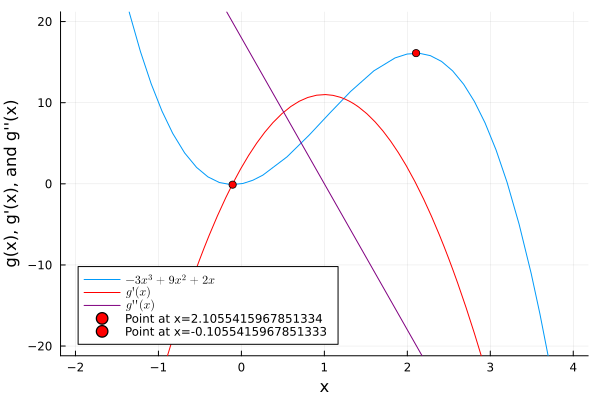

In [1]:
using Plots, LaTeXStrings

legend = L"-3x^3+9x^2+2x"

g(x) = -3*x^3 + 9*x^2 + 2*x
g′(x) = -9*x^2+18*x+2
g′′(x)= 18-18*x

x_value1 = 2.1055415967851334
y_value1 = g(x_value1)

x_value2 = -0.1055415967851333
y_value2= g(x_value2)

plot(x -> g(x), xlim=[-4,4], ylim=[-20,20] ,xlabel="x", ylabel="g(x), g'(x), and g''(x)", label=legend)
plot!(x -> g′(x), xlim=[-2, 4], ylim=[-20, 20], label=L"g'(x)", color="red")
plot!(x -> g′′(x), xlim=[-2, 4], ylim=[-20, 20], label=L"g''(x)", color="purple")
scatter!([x_value1], [y_value1], color="red", label="Point at x=2.1055415967851334")
scatter!([x_value2], [y_value2], color="red", label="Point at x=-0.1055415967851333")

plot!(legend=:bottomleft)  # Set legend position to bottom left

In [121]:
newton_max_uni_a(g, g′, g′′, 0.99, 1e-8, 10000)

The solution is -0.1055415967851333
Number of iterations: 12
Tolerance (ϵ): 1.0e-8


In [122]:
newton_max_uni_a(g, g′, g′′, 1.01, 1e-8, 10000)

The solution is 2.1055415967851334
Number of iterations: 12
Tolerance (ϵ): 1.0e-8


No. They converge to different solutions, indicating that initial values are important for Newton's methods. 

Newton's method starts the action by using information from $\theta_0$. The information on other parts of the objective function is not used. Because it uses information local to $\theta_0$, Newton's method is labeled as a _**local method**_ and it would converge to a _**local extremum**_ located in the neighborhood of $\theta_0$.

#### [Q3] Use the program to estimate $g(x)$. Use 1.0 as the initial value.

 - [Q3.1] Why this initial value does not work for the program? Do you think that the problem arises because the function has an *inflection point* at $x=1.0$?

In [123]:
newton_max_uni_a(g, g′, g′′, 1, 1e-8, 10000)

In general, if $f''(\theta_{i-1})=0$, the updating rule would fail. We can check whether there is an inflection point at x=1.0

||$0.99$|$1$|$1.01$|
|---|---|---|---|
|$g''(\centerdot)$|$+$|$0$|$-$|

Hence, the problem arises because the function has an inflection point at x=1.0

In [124]:
@show g′′(0.99)
@show g′′(1)
@show g′′(1.01)

g′′(0.99) = 0.17999999999999972
g′′(1) = 0
g′′(1.01) = -0.17999999999999972


-0.17999999999999972

 
 - [Q3.2] The problem indicates that the program would fail when the function is not smoothly increasing or increasing. Modify your program such that it could get out of the situation and move on. The program should be named `newton_max_uni_a2`. When you implement the rescue plan, be sure to make use of the fact that the purpose of the program is to **maximize** a function. Use the function to find the maximizer of $g(x)$.

In [125]:
function newton_max_uni_a2(f::Function, f′::Function, f′′::Function, x0, ϵ, maxit)
    iter = 1
    x1 = x0
    jump = 0.1
    
    while iter <= maxit
        
        if f′′(x1) == 0
                x1 = x1+jump*f′(x1) # multiply by f′(x1) to control the direction of the jump; 
                                    # use x1+jump*f′(x1) for local max; x1-jump*f′(x1) for local min
        end
        
        x0 = x1
        x1 = x0 - f′(x0) / f′′(x0)
        
        if abs(x1 - x0) < ϵ

            
            if f′′(x1) > 0
                println("Warning: The found solution is a minimizer instead of a maximizer.")
            end
            
            println("The solution is $x1")
            println("Number of iterations: $iter")
            println("Tolerance (ϵ): $ϵ")
            return
        end
        
        iter += 1
    end
    
    println("Warning: Maximum number of iterations reached. The method did not converge.")
end


newton_max_uni_a2 (generic function with 1 method)

In [126]:
newton_max_uni_a2(g, g′, g′′, 1, 1e-8, 10000)

The solution is 2.1055415967851334
Number of iterations: 3
Tolerance (ϵ): 1.0e-8


#### [Q4] Modify the above program to meet the following specifications

- Instead of requiring users to input analytic forms of the function's 1st and 2nd derivatives, use Julia's `ForwardDiff` to do it automatically. The program should be named `newton_max_uni_b`. The program should look like the following where the 1st and 2nd derivatives are calculated using `ForwardDiff` within the program. Estimate $g(x)$ using this program.

```julia
using ForwardDiff
function newton_max_uni_b(f::Function, x0, ϵ, imax)
    ....
end
```
Hint: `Forward.derivative()` is your friend. You need to find out how to use it to calculate the 2nd derivative.

In [127]:
using ForwardDiff

function newton_max_uni_b(f::Function, x0, ϵ, maxit)
    iter = 1
    x1 = x0
    jump = 0.1
    
    f′(x)= ForwardDiff.derivative(f, x)
    
    f′′(x)= ForwardDiff.derivative(f′, x)
    
    while iter <= maxit
        
        if f′′(x1) == 0
                x1 = x1+jump*f′(x1) # multiply by f′(x1) to control the direction of the jump;
                                    # use x1+jump*f′(x1) for local max; x1-jump*f′(x1) for local min
        end
        
        x0 = x1
        x1 = x0 - f′(x0) / f′′(x0)
        
        if abs(x1 - x0) < ϵ

            
            if f′′(x1) > 0
                println("Warning: The found solution is a minimizer instead of a maximizer.")
            end
            
            println("The solution is $x1")
            println("Number of iterations: $iter")
            println("Tolerance (ϵ): $ϵ")
            return
        end
        
        iter += 1
    end
    
    println("Warning: Maximum number of iterations reached. The method did not converge.")
end


newton_max_uni_b (generic function with 1 method)

In [128]:
newton_max_uni_b(g, 1, 1e-8, 10000)

The solution is 2.105541596785134
Number of iterations: 3
Tolerance (ϵ): 1.0e-8


In [129]:
newton_max_uni_b(g, 1.01, 1e-8, 10000)

The solution is 2.1055415967851334
Number of iterations: 12
Tolerance (ϵ): 1.0e-8


In [130]:
newton_max_uni_b(g, 0.99, 1e-8, 10000)

The solution is -0.1055415967851333
Number of iterations: 12
Tolerance (ϵ): 1.0e-8


### [Q5] Write a Julia program to implement Newton's method of finding the maximizers of a multi-variate function. The program should meet the following requirements:

- The program should be named `newton_max_a` (for ease of grading).


- The inputs should at least contain the following items:

```julia
function newton_max_a(f::Function, init, ϵ, maxit) 
   ...
end
```
   where `f` is the objective function, `init` is the vector of initial values, `ϵ` is the tolerance of convergence criterion, and `maxit` is the maximum number of iterations.
   

- The `f` is a function of `n` variables where `n` is larger than or equal to 1.
   

- Use `ForwardDiff` to calculate the gradient vector and the Hessian matrix.
  - Hint: `ForwardDiff.gradient()` and `ForwardDiff.hessian()`.


- Use the norm of the gradient as the basis to check convergence, i.e., $||g(\centerdot)||<\epsilon$.
  - Hint: Google how to calculate the norm of a vector in Julia.


- The program should be able to check whether the found solution is a maximizer or a minimizer (hint: check whether the Hessian is positive definite or negative definite). If it is a minimizer instead of a maximizer, a warning should be issued.
  - Hint: Google how to check a matrix's definite using Julia.


- The program should print at least the following information: the solution, the number of iterations, and actual ϵ. If the number of iterations equals `maxit` (meaning, the estimation may not have converged), a warning should be issued.

In [2]:
using ForwardDiff, LinearAlgebra

function newton_max_a(f::Function, init, ϵ, maxit)
    iter=1
    
    n=init # initial input point
    
    grad(x)=ForwardDiff.gradient(f, x) # calculate gradient
    hess(x)=ForwardDiff.hessian(f, x) # calculate hessian
    
    
    while iter<=maxit
        
        if LinearAlgebra.det(hess(n)) == 0 # check for intertibility of Hessian matrix
            n = n + 0.1.*grad(n)
        end
        
        init = n
        n = init - inv(hess(init)) * grad(init)
        
        if norm(grad(n))<ϵ
            
            if isposdef(hess(n)) # check for positive definite of the Hessian matrix
                println("Warning: The found solution is a minimizer instead of a maximizer.")
            end

            println("The solution is $n")
            println("Number of iterations: $iter")
            println("Tolerance (ϵ): $ϵ")
            return
        end
        
        
        iter+=1
    end
    
    
    println("Warning: Maximum number of iterations reached. The method did not converge.")
end

newton_max_a (generic function with 2 methods)

#### [Q6] Use the program to estimate $h(x,y)$. Hint: Code the function as `h(x) = -(1.5 - x[1])^2 - 100*(x[2] - x[1]^2)^2` where `x` is a vector.


In [3]:
h(x) = -(1.5 - x[1])^2 - 100*(x[2] - x[1]^2)^2

newton_max_a(h, [1.0,2.0], 1e-8, 10000)



The solution is [1.4999999999999984, 2.2499999999999956]
Number of iterations: 5
Tolerance (ϵ): 1.0e-8


#### [Q7] Use the program to estimate $k(x,y)$. Hint: Code the function as `k(x) = - (x[1] + 2*x[2] - 7)^2 - (2*x[1] + x[2] -5)^2` where `x` is a vector. The estimation should converge in 1 iteration (since it is quadratic function).

因為 Newton's method 是 quadratic approximation, 所以如果目標函數也是 quadratic function, 那麼一次就可以收斂。

In [4]:
k(x) = - (x[1] + 2*x[2] - 7)^2 - (2*x[1] + x[2] -5)^2


newton_max_a(k, [2.0,3.0], 1e-8, 10000)

The solution is [1.0000000000000002, 3.0]
Number of iterations: 1
Tolerance (ϵ): 1.0e-8





#### [Q8] Use the program to estimate $g(x)$. Hint: Code the function as `g(x) = -3*x[1]^3 + 9*x[1]^2 + 2*x[1]` where `x` is a vector.

In [141]:
g(x) = -3*x[1]^3 + 9*x[1]^2 + 2*x[1]


newton_max_a(g, [1.01], 1e-8, 10000)

The solution is [2.1055415967851334]
Number of iterations: 11
Tolerance (ϵ): 1.0e-8


In [142]:
newton_max_a(g, [0.99], 1e-8, 10000)

The solution is [-0.10554159678513347]
Number of iterations: 11
Tolerance (ϵ): 1.0e-8


In [143]:
newton_max_a(g, [1], 1e-8, 10000)

The solution is [2.105541596873255]
Number of iterations: 2
Tolerance (ϵ): 1.0e-8


In [1]:
using LinearAlgebra, ForwardDiff, Random


function newton_max_a(f, init, ϵ, maxit)         # from earlier homework
    iter, Δ, x0, x1 = 1, fill(Inf, length(init)), init, init  # dimensions of f & init should be consistent
    ∇f(x) = ForwardDiff.gradient(f, x)          # define the functions outside the loop
      H(x) = ForwardDiff.hessian(f, x)
    while norm(Δ) > ϵ && iter ≤ maxit            # check the gradient  
        x1 = x0 - inv(H(x0))*∇f(x0)             # inv is from LinearAlgebra  
        Δ, x0, iter = ∇f(x1), x1, iter+1    
    end    
    println("* The solution is $x1, the iteration count is ", iter-1, " and the norm of the gradient is ", norm(Δ), ".")   
    if iter-1 == maxit   # iter number=maxit does not necessarily mean not converged
       println("  The iteration count is exactly equal to maxit, and the estimation may not have converged.") 
    end    
    !isposdef(H(x1)) || println("  The solution appears to be a minimum rather than a maximum.")
    return x1, iter-1, Δ    
end


* The solution is [1.0000000000000002, 3.0], the iteration count is 1 and the norm of the gradient is 0.0.


([1.0000000000000002, 3.0], 1, [-0.0, -0.0])